**Classifying Movie Reviews** - Binary classification example

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
print(train_data[0]) # Training data string in ints
print(train_labels[0]) # Training label 1 or 0 for positive or negative

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
print(max([max(i) for i in train_data]))

9999


In [5]:
word_index = imdb.get_word_index()
word_dict = dict([(value, key) for (key, value) in word_index.items()])
print(word_dict.get(5))
decode_string = " ".join([word_dict.get(i-1, "?") for i in train_data[0]])
print(decode_string)

to
? was not for it's self joke professional disappointment see already pretending their staged a every so found of his movies it's third plot good episodes the in who guess wasn't of doesn't a again plot find the poor let her a again vegas trouble with fight like that oh a big good for to watching essentially but was not a fat centers turn a not well how this for it's self like bad as that natural a not with starts with this for david movie the of only moments this br special br films of a sell infected for guess their childish an a man this for like musical of his ever more so while there his feelings an to not this role be get when of was others for people the br a character love newer as found a the is turner of upon so well it's self fine have early seeing if is a the social that watch him a sex as plays could by suffering time have through to long skeptical movie a music not on scene fine have guess of i'm all sympathize movie more so be whole its his watch a music see for like b

In [6]:
# Multi-Hot encoding
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [7]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.5634 - accuracy: 0.7341 - val_loss: 0.4368 - val_accuracy: 0.8464
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3436 - accuracy: 0.8953 - val_loss: 0.3227 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2429 - accuracy: 0.9251 - val_loss: 0.2861 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1886 - accuracy: 0.9411 - val_loss: 0.2754 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1547 - accuracy: 0.9525 - val_loss: 0.2854 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1281 - accuracy: 0.9598 - val_loss: 0.2867 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1073 - accuracy: 0.9669 - val_loss: 0.3122 - val_accuracy: 0.8819
Epoch 8/20
30/30 [=

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

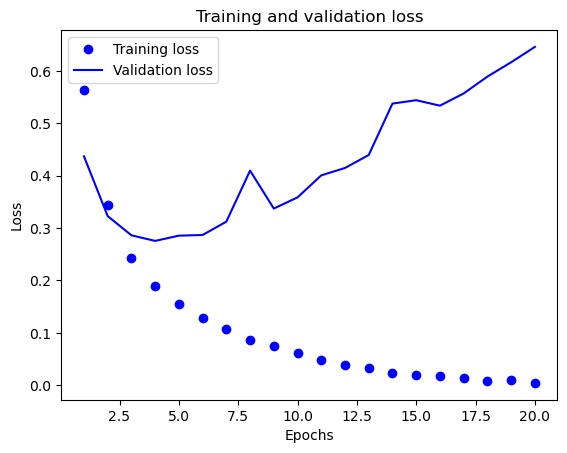

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

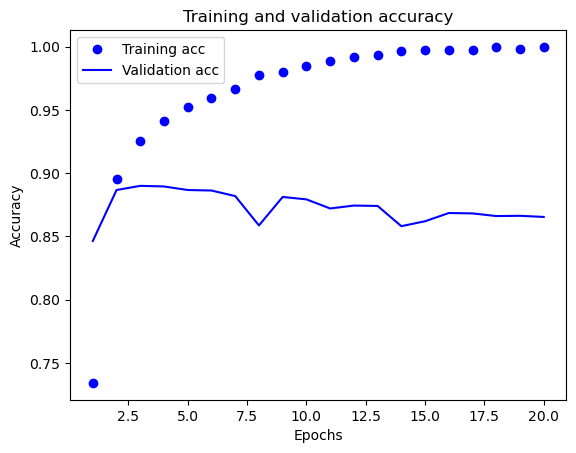

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
prediction = model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


In [25]:
prediction_labels = [1 if i>0.5 else 0 for i in prediction]
print(prediction_labels[:20])
print(y_test[:20])

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
